In [294]:
import numpy as np
import matplotlib.pyplot as plt


In [324]:
from sklearn.datasets import make_regression
# Generate features matrix, target vector, and the true coefficients
X, y, _ = make_regression(n_samples = 20, n_features = 1, coef = True, noise=30.0, random_state = 2)
y = y / 100
X_new = np.linspace(-2, 2, 100).reshape(100, 1)


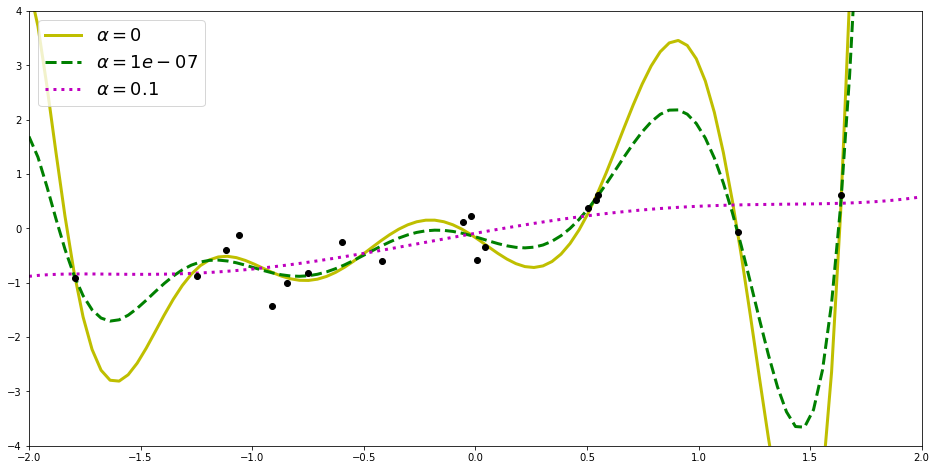

In [325]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge


def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("y-", "g--", "m:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_ft", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=3, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "ko", linewidth=3)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis([-2, 2, -4, 4])
    
plt.figure(figsize=(16,8))
plot_model(Ridge, polynomial=True, alphas=(0, 1e-07, 0.1), random_state=17)

# plt.show()